# Exploratory analysis

## Library imports

In [84]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

We have gather loads of data, that we have though is usefull for the election prediction results. We want to explore what we might expect when we use given data to try and predict the final result.
This will help us ilustrate why given indicator reflects voters decision better than other indicators and so on. 

In [85]:
data_polls: pd.DataFrame = pd.read_csv("../data/polls_by_election.csv")

This is our main dataset it contains data that we want to use mainly to predict the outcome of given election.
We have previously filtered only parties that have at least once received 1.5% in the polls a year before the election.
Each record contains last 12 polls results for a given party, that was done before the election.
As well for each party we have combined data from the election results and previous election results to establish, whether before this election cycle a given party was in parliament and whether it was in opposition or coalition. 

In [86]:
data_polls.head() #sneak peak into the data

,political_party,election_date,election_result,elected_to_parliament,in_coalition_before,in_opposition_before,1,2,3,4,5,6,7,8,9,10,11,12
0,smer_sd,2023-09-30,22.94,1,0,1,18.0,20.0,18.1,19.0,17.7,17.6,14.6,16.6,15.6,15.3,15.6,16.3
1,sdku_ds,2023-09-30,0.02,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,sas,2023-09-30,6.32,1,1,0,5.8,6.1,5.2,5.0,5.2,5.1,5.3,5.6,8.1,8.2,12.0,11.1
3,ds,2023-09-30,0.00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,sho,2023-09-30,0.04,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
data_last_election = data_polls[(data_polls["election_date"] == "2023-09-30") & (data_polls["election_result"] > 0) & (data_polls['1'] > 0)]
data_last_election

,political_party,election_date,election_result,elected_to_parliament,in_coalition_before,in_opposition_before,1,2,3,4,5,6,7,8,9,10,11,12
0,smer_sd,2023-09-30,22.94,1,0,1,18.0,20.0,18.1,19.0,17.7,17.6,14.6,16.6,15.6,15.3,15.6,16.3
2,sas,2023-09-30,6.32,1,1,0,5.8,6.1,5.2,5.0,5.2,5.1,5.3,5.6,8.1,8.2,12.0,11.1
18,kdh,2023-09-30,6.82,1,0,0,6.5,6.1,5.6,6.0,6.0,5.8,6.9,5.9,6.9,6.2,6.0,5.8
20,sns,2023-09-30,5.62,1,0,0,6.4,5.3,5.1,5.5,4.0,3.4,3.6,3.4,3.8,3.9,3.8,3.9
24,sme_rodina,2023-09-30,2.21,0,1,0,4.1,5.1,5.6,6.1,6.1,7.7,7.7,8.2,6.6,7.0,6.3,6.1
26,progresivne_slovensko,2023-09-30,17.96,1,0,0,16.6,15.0,14.3,13.5,13.1,12.1,11.0,12.8,10.2,9.6,8.1,8.3
27,lsns,2023-09-30,0.84,0,0,1,1.7,2.1,2.3,2.1,2.7,2.7,2.9,3.1,3.5,2.9,3.8,4.3
28,olano,2023-09-30,8.89,1,1,0,8.2,6.4,6.2,6.0,5.6,4.3,6.4,7.4,7.0,7.2,7.8,8.0
67,republika,2023-09-30,4.75,0,0,0,7.7,8.8,8.7,9.0,9.8,9.6,8.5,6.9,7.2,7.8,7.0,7.8
68,hlas_sd,2023-09-30,14.70,1,0,1,13.7,14.2,16.0,16.3,17.0,17.1,20.8,19.0,19.4,20.3,18.5,17.8


I woul like to look at hwo the last 12 months

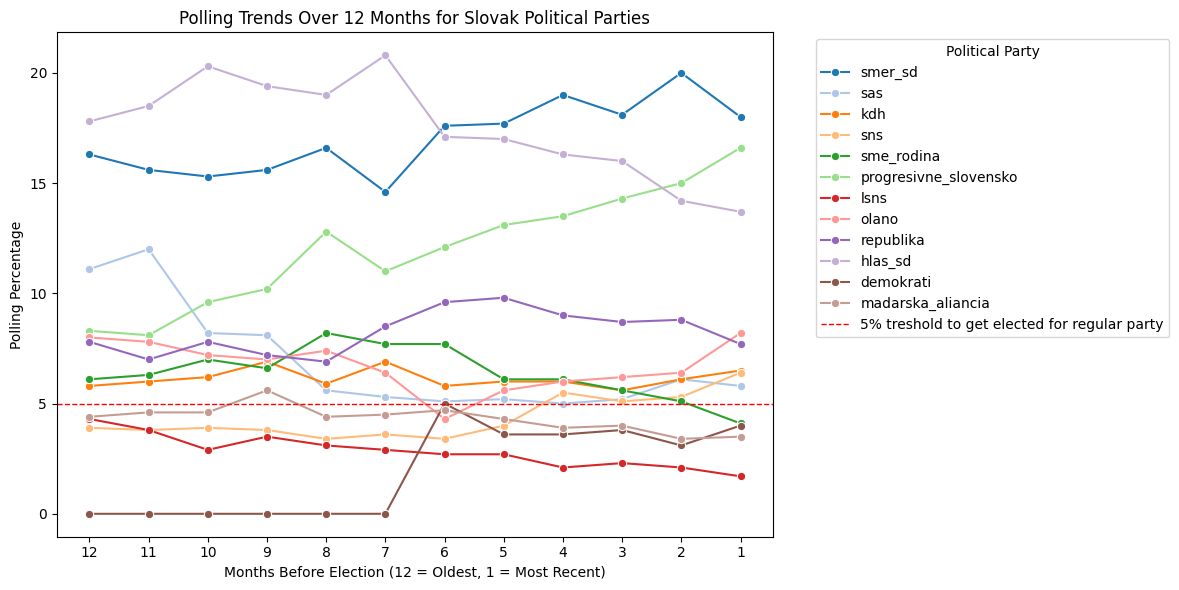

In [88]:
polling_columns = [str(i) for i in range(1, 13)]
polls_long = data_last_election.melt(
    id_vars=['political_party', 'election_date', 'election_result', 'elected_to_parliament', 
             'in_coalition_before', 'in_opposition_before'],
    value_vars=polling_columns,
    var_name='month',
    value_name='poll_percentage'
)

polls_long['month'] = polls_long['month'].astype(int)

polls_long['month'] = 13 - polls_long['month']  # Reverse month order 

# Plot polling trends for each political party
plt.figure(figsize=(12, 6))
sns.lineplot(data=polls_long, x='month', y='poll_percentage', hue='political_party', marker='o',  palette='tab20')

plt.title('Polling Trends Over 12 Months for Slovak Political Parties')
plt.axhline(y=5, color='red', linestyle='--', linewidth=1, label='5% treshold to get elected for regular party')
plt.xlabel('Months Before Election (12 = Oldest, 1 = Most Recent)')
plt.ylabel('Polling Percentage')
plt.legend(title='Political Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=range(1, 13), labels=range(12, 0, -1))  # Reverse x-axis labels
plt.tight_layout()

plt.show()


It would be nice to also add the final result of the election into the graph

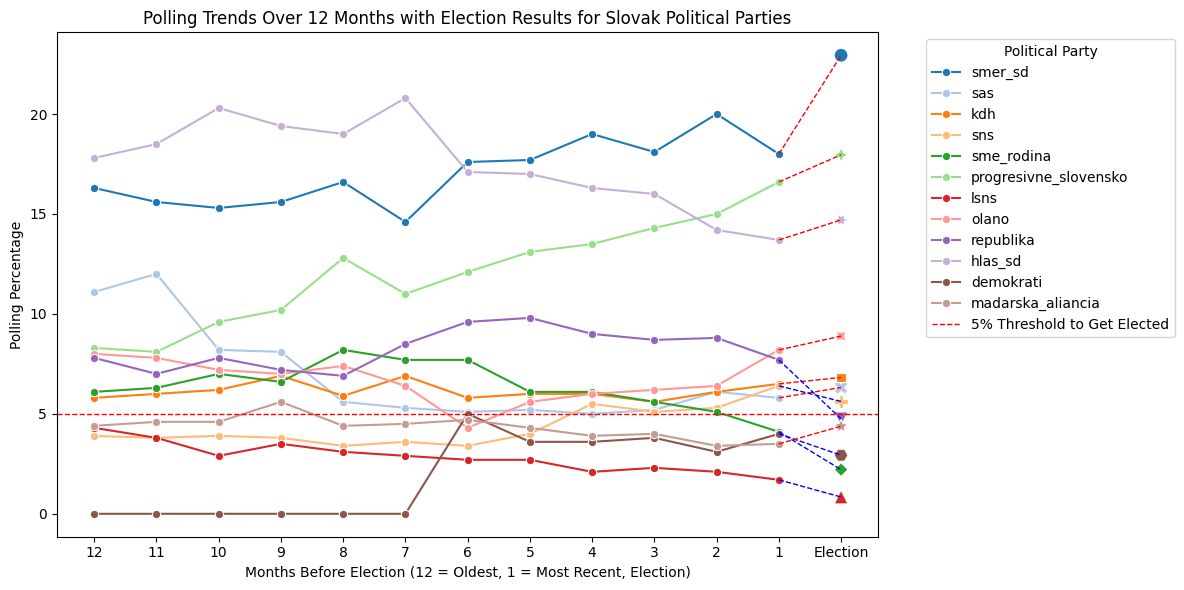

In [89]:
# Prepare the data for the 1-month poll and election results
poll_and_results = polls_long[polls_long['month'] == 12][['political_party', 'poll_percentage', "election_result"]]
palette = sns.color_palette('tab20', n_colors=poll_and_results["political_party"].nunique())
plt.figure(figsize=(12, 6))
sns.lineplot(data=polls_long, x='month', y='poll_percentage', hue='political_party', marker='o', palette=palette)

# Add lines connecting 1-month poll to election result
for _, row in poll_and_results.iterrows():
    if row['poll_percentage'] <= row['election_result']:
        plt.plot(
            [12, 13],  
            [row['poll_percentage'], row['election_result']],  
            color='red', linestyle='--', linewidth=1
        )
    else:
        plt.plot(
            [12, 13],  
            [row['poll_percentage'], row['election_result']],  
            color='blue', linestyle='--', linewidth=1
        )

sns.scatterplot(data=poll_and_results, x=[13] * len(poll_and_results), y='election_result', 
                hue='political_party', style='political_party', s=100, palette=palette, legend=False)

plt.title('Polling Trends Over 12 Months with Election Results for Slovak Political Parties')
plt.axhline(y=5, color='red', linestyle='--', linewidth=1, label='5% Threshold to Get Elected')
plt.xlabel('Months Before Election (12 = Oldest, 1 = Most Recent, Election)')
plt.ylabel('Polling Percentage')
plt.legend(title='Political Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=list(range(1, 13)) + [13], labels=list(range(12, 0, -1)) + ['Election'])  # Add "Election" at x=13
plt.tight_layout()

plt.show()

Now lets do this for each election separately

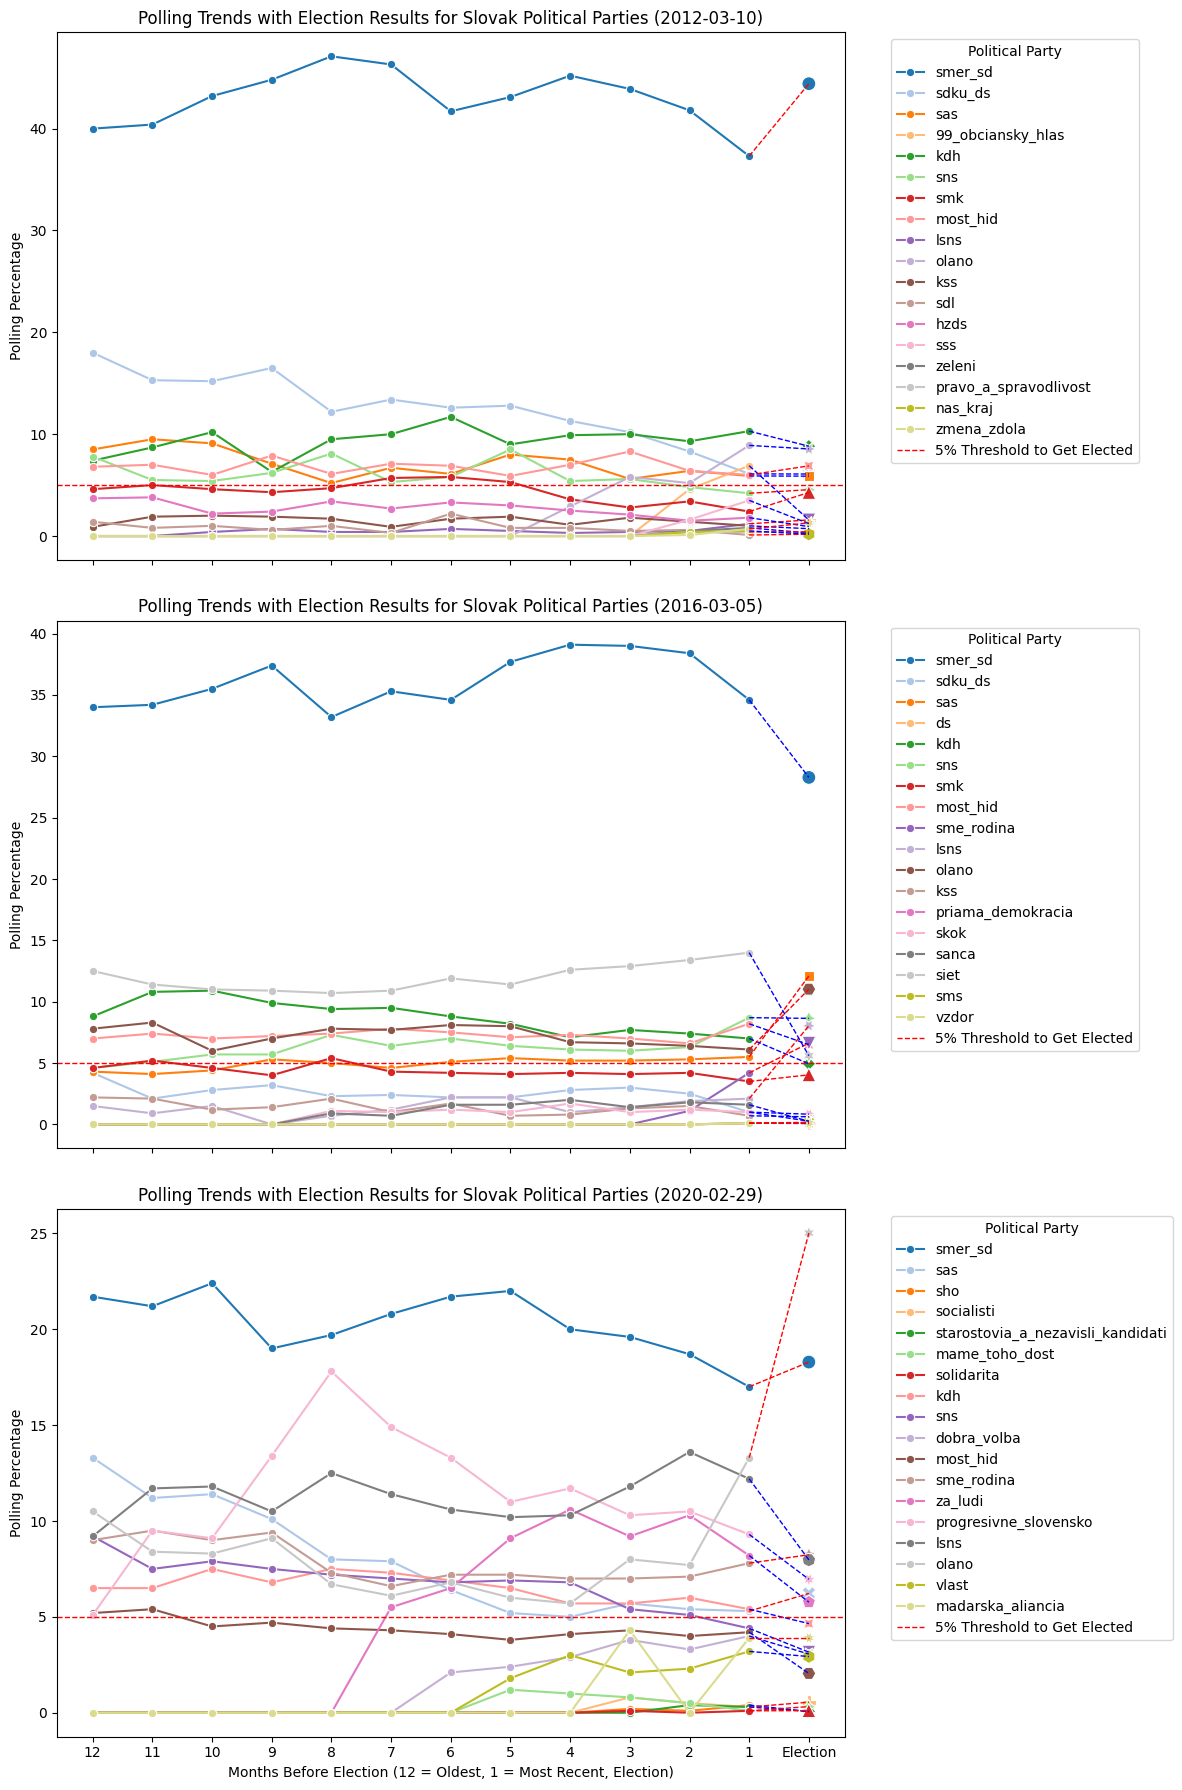

In [90]:

# Filter data for valid elections and group by election_date
data_election_relevant = data_polls[
    (data_polls["election_result"] > 0) & (data_polls['1'] > 0)
]

# Group data by election_date
grouped_data = data_election_relevant.groupby("election_date")
total_elections = len(grouped_data)
total_elections -= 1 # forget last one 

fig, axes = plt.subplots(nrows=total_elections, ncols=1, figsize=(12, 6 * total_elections), sharex=True)


for ax, (election_date, group_data) in zip(axes, grouped_data):
    if election_date == "2023-09-30":
        continue
    polling_columns = [str(i) for i in range(1, 13)]
    polls_long = group_data.melt(
        id_vars=['political_party', 'election_date', 'election_result', 'elected_to_parliament',
                 'in_coalition_before', 'in_opposition_before'],
        value_vars=polling_columns,
        var_name='month',
        value_name='poll_percentage'
    )

    polls_long['month'] = polls_long['month'].astype(int)
    polls_long['month'] = 13 - polls_long['month']  # Reverse month order

    # Prepare data for Polling vs Election Results
    poll_and_results = polls_long[polls_long['month'] == 12][['political_party', 'poll_percentage', 'election_result']]
    palette = sns.color_palette('tab20', n_colors=poll_and_results["political_party"].nunique())

    # Plot Polling Trends with Election Results
    sns.lineplot(data=polls_long, x='month', y='poll_percentage', hue='political_party', marker='o', palette=palette, ax=ax)

    # Add lines connecting 1-month poll to election result
    for _, row in poll_and_results.iterrows():
        if row['poll_percentage'] <= row['election_result']:
            ax.plot(
                [12, 13],  # red dotted line if given party overperformed
                [row['poll_percentage'], row['election_result']],  
                color='red', linestyle='--', linewidth=1
            )
        else:
            ax.plot(
                [12, 13],  # blue dotted line if given party underperformed
                [row['poll_percentage'], row['election_result']],  
                color='blue', linestyle='--', linewidth=1
            )

    sns.scatterplot(data=poll_and_results, x=[13] * len(poll_and_results), y='election_result', 
                    hue='political_party', style='political_party', s=100, palette=palette, legend=False, ax=ax)

    ax.set_title(f'Polling Trends with Election Results for Slovak Political Parties ({election_date})')
    ax.axhline(y=5, color='red', linestyle='--', linewidth=1, label='5% Threshold to Get Elected')
    ax.set_xlabel('Months Before Election (12 = Oldest, 1 = Most Recent, Election)')
    ax.set_ylabel('Polling Percentage')
    ax.legend(title='Political Party', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_xticks(list(range(1, 13)) + [13])
    ax.set_xticklabels(list(range(12, 0, -1)) + ['Election']) 

plt.tight_layout()
plt.show()


From given graphs we can see that the trends that show given party is rising over time might not pan out in the election as clearly as it might seem.
Some growth happens linearly over time some looks exponantial like the one that Olano experienced in 2020. Some parties overperform polls regularly like SMER in 2012, 2020, 2023. 
Last weeks of the election seem to matter the most as many people are not yet decided and that might explain some huge jumps in performance like Siet in 2016 barely getting in. 
Overall we believe that other indicators might be usefull for forecasting the election to overperform the results from last poll recorded. 
Therefore we will explore them further. 

We want to look at how being in charge of the country impacted given political parties, mostly because if quality of life gets worse for people they tend to blame it on the politicians in charge. So knowing given parties were in charge might be usefull 

In [91]:
#data about getting to parlament/forming coalition or oppossition
data_coalition: pd.DataFrame = pd.read_csv("../data/elected_parties.csv")
data_coalition.head()

,political_party,until,coalition
0,sdku_ds,2012-03-10,1
1,smer_sd,2012-03-10,0
2,sas,2012-03-10,1
3,kdh,2012-03-10,1
4,most_hid,2012-03-10,1


In [92]:
#data purely about election result
data_election_result: pd.DataFrame = pd.read_csv("../data/election_results.csv")
data_election_result.head()

,political_party,2012,2016,2020,2023
0,zeleni,0.30,NaN,NaN,NaN
1,kdh,8.82,4.94,4.65,6.82
2,sdl,0.18,NaN,NaN,NaN
3,sns,4.55,8.64,3.16,5.62
4,olano,8.55,11.02,25.02,8.89


In [93]:
data_coalition['until_year'] = pd.to_datetime(data_coalition['until']).dt.year
coalition_mapping = data_coalition.pivot_table(
    index='political_party', 
    columns='until_year', 
    values='coalition', 
    fill_value=0
).reset_index()
coalition_mapping.columns.name = None
coalition_mapping.rename(columns=lambda x: f"coalition_{x}" if isinstance(x, int) else x, inplace=True)


# Merge with coalition data for each year
df_combined = pd.merge(
    data_election_result, 
    coalition_mapping, 
    on='political_party', 
    how='left'
)
df_combined = df_combined.fillna(0)
df_combined
columns_to_check = ['2012', '2016', '2020', '2023']
df_filtered = df_combined[df_combined[columns_to_check].ne(0).sum(axis=1) > 1]

df_changes = pd.DataFrame()
df_changes["political_party"] = df_filtered["political_party"]
df_changes['percentage_change_2016'] = df_filtered["2016"] - df_filtered["2012"]
df_changes['percentage_change_2020'] = df_filtered["2020"] - df_filtered["2016"]
df_changes['percentage_change_2023'] = df_filtered["2023"] - df_filtered["2020"]
df_changes['coalition_2016'] = df_filtered['coalition_2016']
df_changes['coalition_2020'] = df_filtered['coalition_2020']
df_changes['coalition_2023'] = df_filtered['coalition_2023']
df_changes

,political_party,percentage_change_2016,percentage_change_2020,percentage_change_2023,coalition_2016,coalition_2020,coalition_2023
1,kdh,-3.88,-0.29,2.17,0.0,0.0,0.0
3,sns,4.09,-5.48,2.46,0.0,1.0,0.0
4,olano,2.47,14.00,-16.13,0.0,0.0,1.0
5,sas,6.22,-5.88,0.10,0.0,0.0,1.0
7,nas_kraj,-0.19,0.00,0.31,0.0,0.0,0.0
9,lsns,6.46,-0.07,-7.13,0.0,0.0,0.0
10,smer_sd,-16.13,-9.99,4.65,1.0,1.0,0.0
12,kss,-0.10,-0.62,0.33,0.0,0.0,0.0
13,most_hid,-0.39,-4.45,-1.79,0.0,1.0,0.0
14,99_obciansky_hlas,-1.58,0.00,0.04,0.0,0.0,0.0


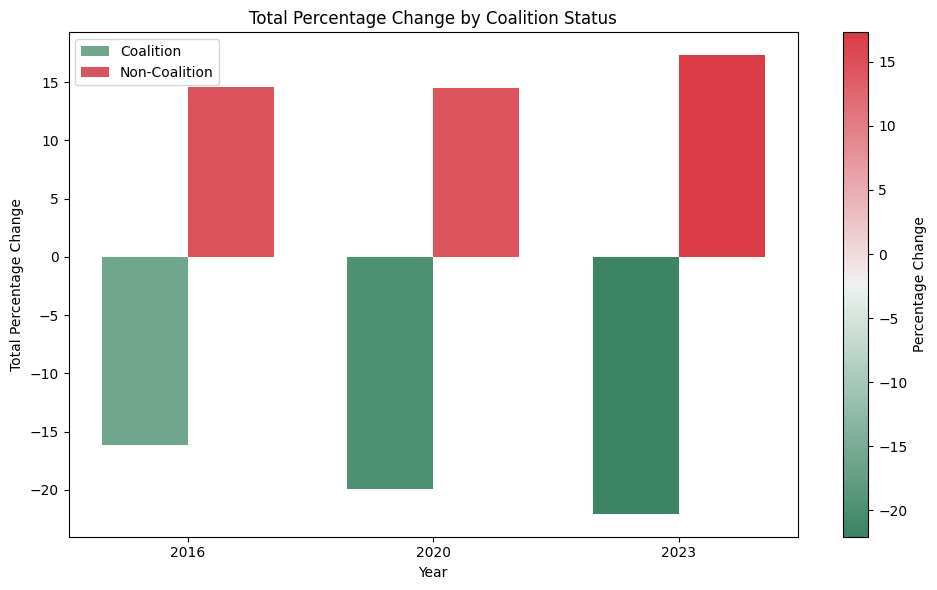

In [94]:
coalition_years = {
    "2016": df_changes[df_changes["coalition_2016"] == 1]["percentage_change_2016"],
    "2020": df_changes[df_changes["coalition_2020"] == 1]["percentage_change_2020"],
    "2023": df_changes[df_changes["coalition_2023"] == 1]["percentage_change_2023"],
}

non_coalition_years = {
    "2016": df_changes[df_changes["coalition_2016"] == 0]["percentage_change_2016"],
    "2020": df_changes[df_changes["coalition_2020"] == 0]["percentage_change_2020"],
    "2023": df_changes[df_changes["coalition_2023"] == 0]["percentage_change_2023"],
}

years = list(coalition_years.keys())
coalition_losses = [coalition_years[year].sum() for year in years]
non_coalition_losses = [non_coalition_years[year].sum() for year in years]

# Normalize data for colormap
all_losses = coalition_losses + non_coalition_losses
norm = plt.Normalize(vmin=min(all_losses), vmax=max(all_losses))

# Create a colormap
cmap = sns.diverging_palette(150, 10, as_cmap=True)

x = np.arange(len(years))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Coalition bars
coalition_bars = ax.bar(x - width/2, coalition_losses, width, 
                        label='Coalition', color=cmap(norm(coalition_losses)))

# Non-Coalition bars
non_coalition_bars = ax.bar(x + width/2, non_coalition_losses, width, 
                            label='Non-Coalition', color=cmap(norm(non_coalition_losses)))

ax.set_xlabel('Year')
ax.set_ylabel('Total Percentage Change')
ax.set_title('Total Percentage Change by Coalition Status')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

# Add colorbar for reference
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Percentage Change')

plt.tight_layout()
plt.show()


We can clearly see that parties in coalition tend to lose a lot of their voting base, we do not know if they switch to vote for opposition or if they vote for diffrent party in their spectrum but it seems to hurt your party if you are in the charge of the country. As well parties outside of coalition seem to get rewarded by not rulling. This finding might justifie having info about parties involvment in goverment prior to the election